# Support Vector Machines


In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

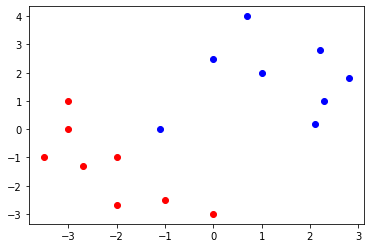

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

<img src="1.jpg">
<img src="2.jpg">
<img src="3.jpg">

**Note: You cannot use sklearn SVM functions here**

In [4]:
# Write your code here
dimenstions = 2

X = X.reshape([-1,dimenstions])
y = y.reshape([-1,1])

In [5]:
def hard_margin_svm(trainX, trainy):
    
    total_data_count = trainX.shape[0]

    w = cp.Variable((dimenstions,1))
    b = cp.Variable()

    obj = cp.Minimize((0.5 * (cp.norm(w)**2)))
    constraints = [trainy[i] @ (w.T @ trainX[i] + b) >= 1 for i in range(0, total_data_count)]

    problem = cp.Problem(obj, constraints)
    problem.solve()

    w = w.value
    b = b.value
    
    return w, b

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [6]:
# Write your code here
def plot_results(w, b, trainX, trainy, C=-1):
    max_x = int(np.max(trainX, axis=0)[0]+1)
    min_x = int(np.min(trainX, axis=0)[0]-1)

    x_values = np.linspace(min_x, max_x, 20)
    
    # w0*x + w1*y + b = 0
    # y = (-b -w0*x)/w1

    plt.plot(x_values, -(b + w[0]*x_values)/w[1], 'm')
    plt.plot(x_values, -(b + 1 + w[0]*x_values)/w[1],'g--')
    plt.plot(x_values, -(b - 1 + w[0]*x_values)/w[1], 'y--')

    if C == -1:
        title = "Hard margin SVM"
    else:
        title = "Soft margin SVM with C="+str(C)

    plt.title("Visulization of points and lines obtained by "+title)

    plot_points(trainX, trainy)
    plt.show()

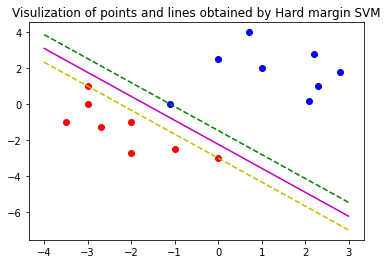

In [7]:
w, b = hard_margin_svm(X, y)
plot_results(w, b, X, y)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

In [8]:
# Write your code here
def plot_results_boundry(w, b, trainX, trainy, C=-1):
    max_x = int(np.max(trainX, axis=0)[0]+1)
    min_x = int(np.min(trainX, axis=0)[0]-1)

    x_values = np.linspace(min_x, max_x, 20)
    
    # w0*x + w1*y + b = 0
    # y = (-b -w0*x)/w1

    plt.plot(x_values, -(b + w[0]*x_values)/w[1], 'm')
    plt.plot(x_values, -(b + 1 + w[0]*x_values)/w[1],'g--')
    plt.plot(x_values, -(b - 1 + w[0]*x_values)/w[1], 'y--')

    if C == -1:
        title = "Hard margin SVM"
    else:
        title = "Soft margin SVM with C="+str(C)

    plt.title("Visulization of points and lines obtained by "+title)

    total_data_count = trainX.shape[0]
    results = [round(trainy[i] @ (w.T @ trainX[i] + b)) for i in range(0, total_data_count)]
        
    temp_trainX = []
    temp_trainy = []
    
    for i in range(len(trainX)):
        if results[i] == 1:
            temp_trainX.append(trainX[i])
            temp_trainy.append(trainy[i])
        
    plot_points(np.array(temp_trainX), np.array(temp_trainy))
    plt.show()

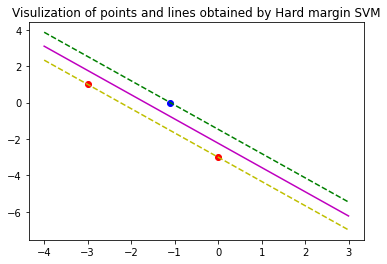

In [9]:
w, b = hard_margin_svm(X, y)
plot_results_boundry(w, b, X, y)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

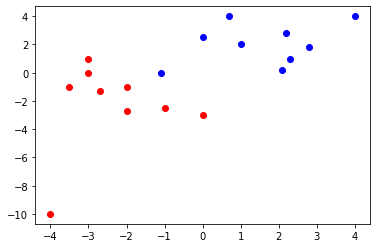

(18, 2)
(18, 1)


In [10]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.append(X, [[-4,-10]], axis=0)
X = np.append(X, [[4,4]], axis=0)

y = np.append(y, [1, -1])

dimenstions = 2
X = X.reshape([-1,dimenstions])
y = y.reshape([-1,1])

plot_points(X, y)
plt.show()

print(X.shape)
print(y.shape)

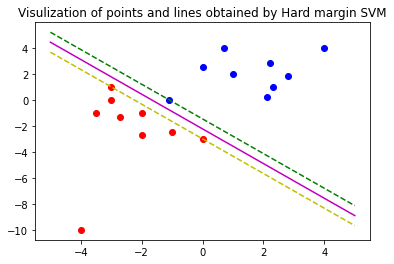

In [11]:
# Solve for the decision boundary using this modified dataset
w, b = hard_margin_svm(X, y)
plot_results(w, b, X, y)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [12]:
def soft_margin_svm(trainX, trainy, C):
    total_data_count = trainX.shape[0]

    w = cp.Variable((dimenstions,1))
    b = cp.Variable()

    slack = cp.Variable((total_data_count,1))
    obj = cp.Minimize( (0.5 * (cp.norm(w)**2)) + C * cp.sum(slack))

    original_constraints = [trainy[i] @ (w.T @ trainX[i] + b) >= 1 - slack[i] for i in range(0, total_data_count)]
    slack_constraints = [slack[i] >= 0 for i in range(len(trainX))]

    constraints = original_constraints + slack_constraints

    problem = cp.Problem(obj, constraints)
    problem.solve()

    w = w.value
    b = b.value
    
    return w, b

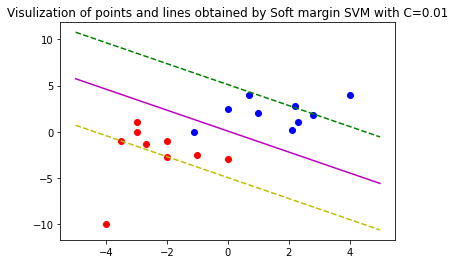

In [13]:
# Write your code here for C= 0.01
w, b = soft_margin_svm(X, y, 0.01)
plot_results(w, b, X, y, C=0.01)

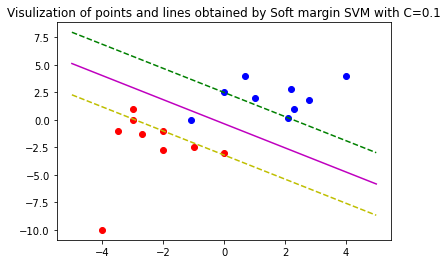

In [14]:
# Write your code here for C= 0.1
w, b = soft_margin_svm(X, y, 0.1)
plot_results(w, b, X, y, C=0.1)

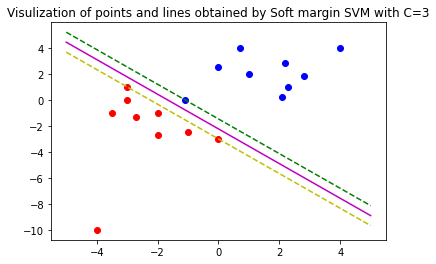

In [15]:
# Write your code here for C= 3
w, b = soft_margin_svm(X, y, 3)
plot_results(w, b, X, y, C=3)

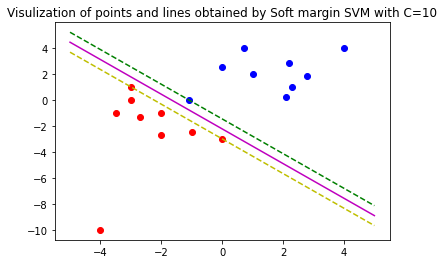

In [16]:
# Write your code here for C= 10
w, b = soft_margin_svm(X, y, 10)
plot_results(w, b, X, y, C=10)

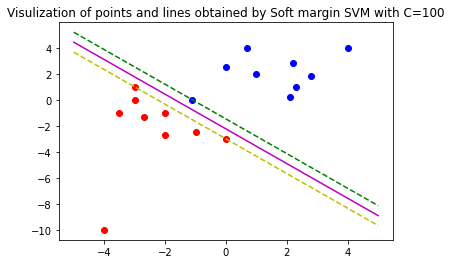

In [17]:
# Write your code here for C= 100
w, b = soft_margin_svm(X, y, 100)
plot_results(w, b, X, y, C=100)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

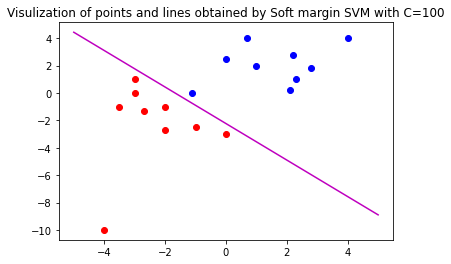

In [18]:
# Write your Code here

def plot_only_saperation_line(w, b, trainX, trainy, C=-1):
    max_x = int(np.max(trainX, axis=0)[0]+1)
    min_x = int(np.min(trainX, axis=0)[0]-1)

    x_values = np.linspace(min_x, max_x, 20)
    
    # w0*x + w1*y + b = 0
    # y = (-b -w0*x)/w1

    plt.plot(x_values, -(b + w[0]*x_values)/w[1], 'm')

    if C == -1:
        title = "Hard margin SVM"
    else:
        title = "Soft margin SVM with C="+str(C)

    plt.title("Visulization of points and lines obtained by "+title)

    plot_points(trainX, trainy)
    plt.show()
    
w, b = soft_margin_svm(X, y, 100)
plot_only_saperation_line(w, b, X, y, C=100)    

### Subsection 2

In [19]:
# !pip install python-mnist
# !rm -rf samples
# !mkdir samples
# !wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
# !gunzip samples/train-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/train-labels-idx1-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
# !gunzip samples/t10k-images-idx3-ubyte.gz
# !wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
# !gunzip samples/t10k-labels-idx1-ubyte.gz

In [20]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [21]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

trainX = []
trainy = []

for i in range(l):
    if labels[i] == 0 or labels[i] == 1 or labels[i] == 2:
        trainX.append(images[i])
        trainy.append(labels[i])

trainX = np.array(trainX)
trainy = np.array(trainy)

print(trainX.shape)
print(trainy.shape)

(18623, 784)
(18623,)


In [22]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)


testX = []
testy = []

for i in range(l):
    if labels[i] == 0 or labels[i] == 1 or labels[i] == 2:
        testX.append(images[i])
        testy.append(labels[i])

testX = np.array(testX)
testy = np.array(testy)

print(testX.shape)
print(testy.shape)

(3147, 784)
(3147,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

c_vals = [100, 10 ,3, 0.1, 0.01]
kernel_vals = ["poly", "sigmoid", "rbf", "linear"]
gamma_vals = ["auto", "scale"]

for C in c_vals:
    for kernel in kernel_vals:
        for gamma in gamma_vals:
            
            SVCClf = SVC(C=C, kernel = kernel, gamma = gamma)
            SVCClf.fit(trainX, trainy)
            
            predy = SVCClf.predict(testX)
            
            print("For")
            print("C=", C)
            print("Kernel=", kernel)
            print("Gamma=", gamma)
            
            true_count = 0
            for i in range(len(predy)):
                if predy[i] == testy[i]:
                    true_count += 1
            
            print()
            print("Accuracy : ", true_count/len(predy))
            
            cm = confusion_matrix(testy, predy)
            cr = classification_report(testy, predy)     
            
            print("confusion_matrix : ")
            print(cm)
            
            print("classification_report : ")
            print(cr)            

For
C= 100
Kernel= poly
Gamma= auto

Accuracy :  0.9939625039720369
confusion_matrix : 
[[ 976    2    2]
 [   0 1131    4]
 [   8    3 1021]]
classification_report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147

For
C= 100
Kernel= poly
Gamma= scale

Accuracy :  0.9939625039720369
confusion_matrix : 
[[ 976    2    2]
 [   0 1131    4]
 [   8    3 1021]]
classification_report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro a

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 100
Kernel= sigmoid
Gamma= scale

Accuracy :  0.9380362249761678
confusion_matrix : 
[[ 932    1   47]
 [   1 1092   42]
 [  55   49  928]]
classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       980
           1       0.96      0.96      0.96      1135
           2       0.91      0.90      0.91      1032

    accuracy                           0.94      3147
   macro avg       0.94      0.94      0.94      3147
weighted avg       0.94      0.94      0.94      3147

For
C= 100
Kernel= rbf
Gamma= auto

Accuracy :  0.3606609469335875
confusion_matrix : 
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
classification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   macro

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 100
Kernel= rbf
Gamma= scale

Accuracy :  0.9955513187162377
confusion_matrix : 
[[ 977    1    2]
 [   0 1132    3]
 [   6    2 1024]]
classification_report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032

    accuracy                           1.00      3147
   macro avg       1.00      1.00      1.00      3147
weighted avg       1.00      1.00      1.00      3147

For
C= 100
Kernel= linear
Gamma= auto

Accuracy :  0.9809342230695901
confusion_matrix : 
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro 

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 10
Kernel= sigmoid
Gamma= scale

Accuracy :  0.9380362249761678
confusion_matrix : 
[[ 931    1   48]
 [   1 1093   41]
 [  55   49  928]]
classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       980
           1       0.96      0.96      0.96      1135
           2       0.91      0.90      0.91      1032

    accuracy                           0.94      3147
   macro avg       0.94      0.94      0.94      3147
weighted avg       0.94      0.94      0.94      3147

For
C= 10
Kernel= rbf
Gamma= auto

Accuracy :  0.3606609469335875
confusion_matrix : 
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
classification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   macro a

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 10
Kernel= rbf
Gamma= scale

Accuracy :  0.9955513187162377
confusion_matrix : 
[[ 977    1    2]
 [   0 1132    3]
 [   6    2 1024]]
classification_report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032

    accuracy                           1.00      3147
   macro avg       1.00      1.00      1.00      3147
weighted avg       1.00      1.00      1.00      3147

For
C= 10
Kernel= linear
Gamma= auto

Accuracy :  0.9809342230695901
confusion_matrix : 
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro av

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 3
Kernel= sigmoid
Gamma= scale

Accuracy :  0.9424849062599301
confusion_matrix : 
[[ 936    1   43]
 [   1 1098   36]
 [  54   46  932]]
classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.96      0.97      0.96      1135
           2       0.92      0.90      0.91      1032

    accuracy                           0.94      3147
   macro avg       0.94      0.94      0.94      3147
weighted avg       0.94      0.94      0.94      3147

For
C= 3
Kernel= rbf
Gamma= auto

Accuracy :  0.3606609469335875
confusion_matrix : 
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
classification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   macro avg

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 3
Kernel= rbf
Gamma= scale

Accuracy :  0.9949157928185574
confusion_matrix : 
[[ 977    1    2]
 [   0 1131    4]
 [   7    2 1023]]
classification_report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147

For
C= 3
Kernel= linear
Gamma= auto

Accuracy :  0.9809342230695901
confusion_matrix : 
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro avg 

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 0.1
Kernel= sigmoid
Gamma= scale

Accuracy :  0.9571020019065777
confusion_matrix : 
[[ 925    2   53]
 [   1 1122   12]
 [  55   12  965]]
classification_report : 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.94      0.94      1032

    accuracy                           0.96      3147
   macro avg       0.96      0.96      0.96      3147
weighted avg       0.96      0.96      0.96      3147

For
C= 0.1
Kernel= rbf
Gamma= auto

Accuracy :  0.3606609469335875
confusion_matrix : 
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
classification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   macro

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 0.1
Kernel= rbf
Gamma= scale

Accuracy :  0.9933269780743565
confusion_matrix : 
[[ 976    1    3]
 [   0 1128    7]
 [   9    1 1022]]
classification_report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147

For
C= 0.1
Kernel= linear
Gamma= auto

Accuracy :  0.9809342230695901
confusion_matrix : 
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macro 

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 0.01
Kernel= sigmoid
Gamma= scale

Accuracy :  0.9771210676835081
confusion_matrix : 
[[ 970    1    9]
 [   0 1125   10]
 [  27   25  980]]
classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.95      0.97      1032

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147

For
C= 0.01
Kernel= rbf
Gamma= auto

Accuracy :  0.3606609469335875
confusion_matrix : 
[[   0  980    0]
 [   0 1135    0]
 [   0 1032    0]]
classification_report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.36      1.00      0.53      1135
           2       0.00      0.00      0.00      1032

    accuracy                           0.36      3147
   mac

/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nisarg/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For
C= 0.01
Kernel= rbf
Gamma= scale

Accuracy :  0.9882427708929139
confusion_matrix : 
[[ 974    1    5]
 [   0 1125   10]
 [  15    6 1011]]
classification_report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147

For
C= 0.01
Kernel= linear
Gamma= auto

Accuracy :  0.9809342230695901
confusion_matrix : 
[[ 971    0    9]
 [   1 1127    7]
 [  24   19  989]]
classification_report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032

    accuracy                           0.98      3147
   macr